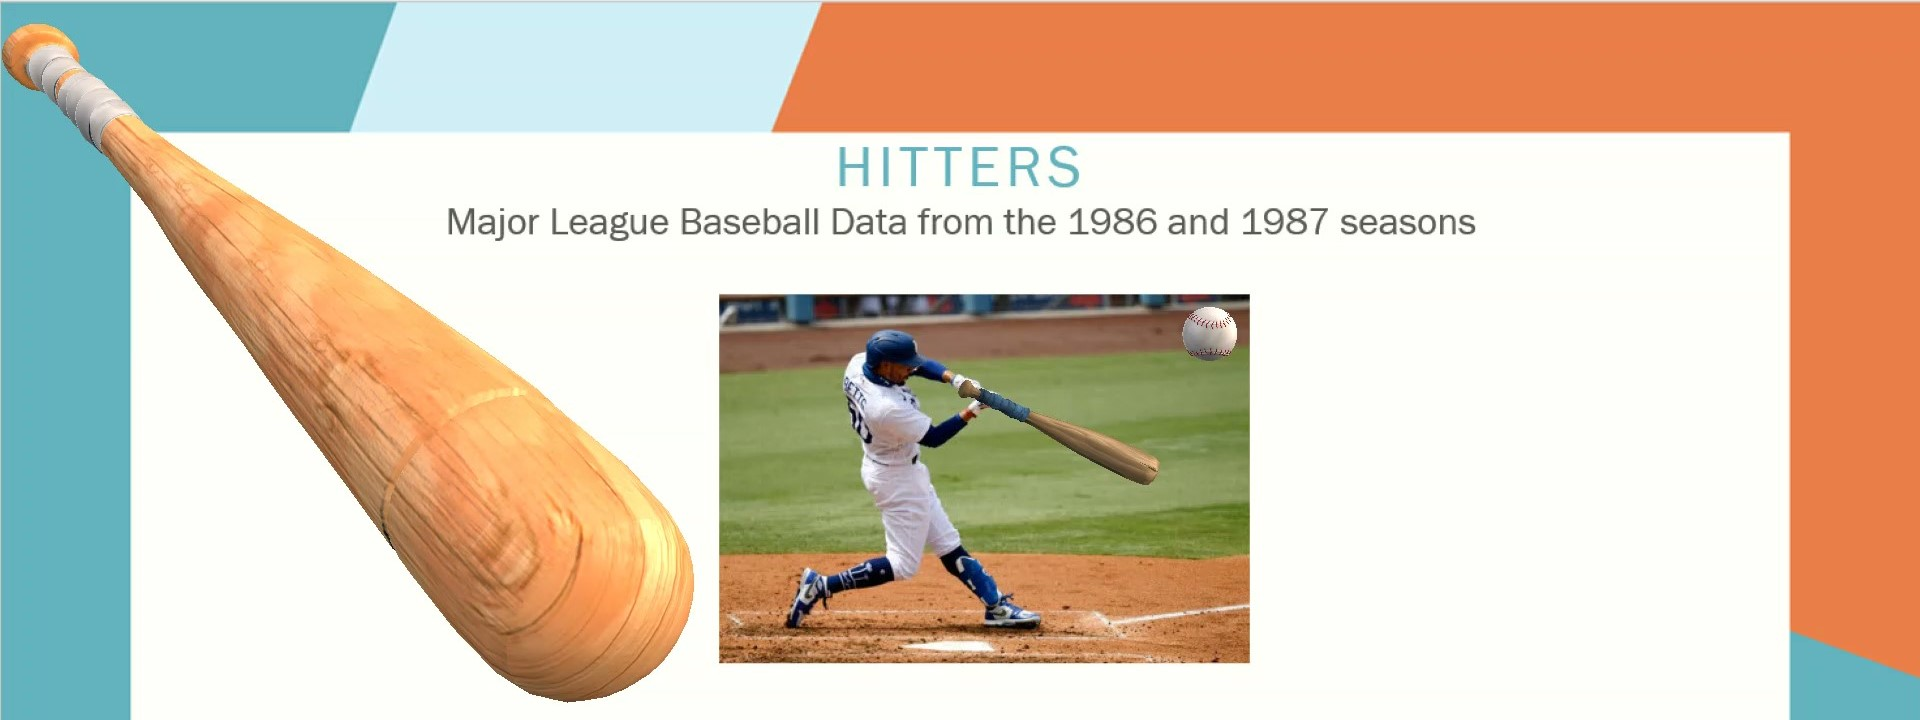

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Introduction](#0) 

* [2. Explatory Data Analysis and Feature Engineering](#0) 
    * [Feature Enginnering](#0) 
    * [Producing New Columns for Feature Engineering](#0) 
    * [Feature Extractions](#0) 
    * [Outliers](#0) 
    * [Missing Values](#0) 
        
* [3. Machine Learning Model](#0) 
    * [Modeling](#0) 
    * [Hyper Parameters Tunning](#0)

* [4. Conclusions](#0) 
* [5. References](#0) 


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 5000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Visualizations Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Generating Random Floating Point Values
from numpy.random import seed
import random
from random import randrange

# System Operations
import sys
import os

pd.options.mode.chained_assignment = None

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, \
    AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">1. Introduction</h1>

Major League Baseball is one of the most watched sports, especially in America. In recent years, the performance of a player and his team is an important parameter that determines the salary. It is therefore important to determine whether a player's performance really matches his worth. Therefore, how to evaluate the salaries of players has always been a hot topic. In addition to the statistical performance of the players on the field, some new variables have also been proposed that may affect the salary of the players. It is well known that there are many studies on the salary of major league baseball, and there are many reasons for the impact of salary. In order to accurately determine the annual salary increase of the players, a classification prediction model is made using some machine learning methods. The results of these studies are useful to increase the accuracy of the model by creating new variables.
    
    
* Problem
    
This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

* Feature Description

    * A data frame with 322 observations of major league players on the following 20 variables.
    * AtBat Number of times at bat in 1986
    * Hits Number of hits in 1986
    * HmRun Number of home runs in 1986
    * Runs Number of runs in 1986
    * RBI Number of runs batted in in 1986
    * Walks Number of walks in 1986
    * Years Number of years in the major leagues
    * CAtBat Number of times at bat during his career
    * CHits Number of hits during his career
    * CHmRun Number of home runs during his career
    * CRuns Number of runs during his career
    * CRBI Number of runs batted in during his career
    * CWalks Number of walks during his career
    * League A factor with levels A and N indicating player’s league at the end of 1986
    * Division A factor with levels E and W indicating player’s division at the end of 1986
    * PutOuts Number of put outs in 1986
    * Assists Number of assists in 1986
    * Errors Number of errors in 1986
    * Salary 1987 annual salary on opening day in thousands of dollars
    * NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987


* Purpose

You are expected to estimate these values. Carrying out a machine learning project that predicts hitters salary with minimum error on the data set we have.


<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">2. Explatory Data Analysis and Feature Engineering</h1>

* The data used in the experiment will be processed using a combination of preprocessing methods to improve the prediction accuracy. Also, some factors will be added to the local dataset to examine the relationship between these factors and the selling price in Iowa.

* Any observations which had missing values were also removed from the dataset. Below are a few feature engineering processes which were done  to cleanse the dataset:


In [ ]:
df = pd.read_csv('/kaggle/input/hitters/Hitters.csv')
df.head()

* Feature selection helps to interpret data, reduce computational requirements, and reduce the impact of the curse of dimensionality, thereby improving the performance of the prediction model.

* Many feature selection methods are available. The main purpose of feature selection is to select the most suitable features as input variables to reduce the number of features and improve the prediction accuracy of machine learning. In this study, it was investigated whether feature selection has an effect on model prediction performance.

In [ ]:
def eda_version():

    def grab_col_names(dataframe, cat_th=10, car_th=20):
        cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
        num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
        cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                       dataframe[col].dtypes == "O"]
        cat_cols = cat_cols + num_but_cat
        cat_cols = [col for col in cat_cols if col not in cat_but_car]
        num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
        num_cols = [col for col in num_cols if col not in num_but_cat]
        return cat_cols, num_cols, cat_but_car

    def replace_with_thresholds(dataframe, column, q1=0.20, q3=0.80):
        quartile1 = dataframe[column].quantile(q1)
        quartile3 = dataframe[column].quantile(q3)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
        dataframe.loc[(dataframe[column] > up_limit), column] = up_limit

    def label_encoder(dataframe, binary_col):
        labelencoder = LabelEncoder()
        dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
        return dataframe

    global df
    df = df[(df['Salary'] < 1500) & (df['Salary'].notnull())]
    #from 322 to 251 rows
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    for col in num_cols:
        replace_with_thresholds(df, col)
    df.loc[:, 'new1'] = 0
    df.loc[(df['CHmRun'] > 100) & (df['AtBat'] > 400), 'new1'] = 1
    df.loc[:, 'new2'] = 0
    df.loc[(df['Years'] < 4), 'new2'] = 1
    df.loc[:, 'new3'] = 0
    df.loc[(df['CHmRun'] < 25) & (df['Walks'] < 40), 'new3'] = 1
    df.loc[:, 'new4'] = 0
    df.loc[(df['AtBat'] > 450) & (df['Walks'] > 70), 'new4'] = 1
    df.loc[:, 'new5'] = 0
    df.loc[(df['RBI'] < 50) & (df['CHmRun'] < 25), 'new5'] = 1
    df['new6'] = df['AtBat'] * df['RBI']
    df['new7'] = df['Walks'] * df['Years']
    df['new8'] = df['AtBat'] / df['Hits']
    df['new9'] = df['AtBat'] / df['Runs']
    df['new10'] = df['Hits'] / df['Runs']
    df['new11'] = df['HmRun'] / df['RBI']
    df['new12'] = df['Runs'] / df['RBI']
    df['new13'] = df['Runs'] / df['RBI']
    df['new14'] = df['Years'] / df['CAtBat']
    df['new15'] = df['Years'] / df['CHits']
    df['new16'] = df['Years'] / df['CHmRun']
    df['new17'] = df['Years'] / df['CRuns']
    df['new18'] = df['Years'] / df['CRBI']
    df['new19'] = df['CAtBat'] / df['CHits']
    df['new20'] = df['CAtBat'] / df['CRuns']
    df['new21'] = df['CAtBat'] / df['CRBI']
    df['new22'] = df['CAtBat'] / df['CWalks']
    df['new23'] = df['CHits'] / df['CRuns']
    df['new24'] = df['CHits'] / df['CRBI']
    df['new25'] = df['CHits'] / df['CWalks']
    df['new26'] = df['CHmRun'] / df['CRuns']
    df['new27'] = df['CHmRun'] / df['CRBI']
    df['new28'] = df['CHmRun'] / df['CWalks']
    df['new29'] = df['CRuns'] / df['CRBI']
    df['new30'] = df['CRuns'] / df['CWalks']
    df['new31'] = df['CHmRun'] / df['CRBI']
    df.replace([np.inf, -np.inf], 0, inplace=True)

    for col in ['League', 'Division', 'NewLeague']:
        df = label_encoder(df, col)

    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    num_cols.remove('Salary')
    for col in num_cols:
        transformer = RobustScaler().fit(df[[col]])
        df[col] = transformer.transform(df[[col]])

    global X,y
    y = df["Salary"]
    X = df.drop(["Salary"], axis=1)

    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    print("EDA Finished.")


In [ ]:
eda_version()

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">3. Machine Learning Model</h1>

In [ ]:
def run_single_model():
    ######################################################
    # Base Models
    ######################################################

    models = [('LR', LinearRegression()),
              ("Ridge", Ridge()),
              ("Lasso", Lasso()),
              ("ElasticNet", ElasticNet()),
              ('KNN', KNeighborsRegressor()),
              ('CART', DecisionTreeRegressor()),
              ('RF', RandomForestRegressor()),
              ('SVR', SVR()),
              ('GBM', GradientBoostingRegressor()),
              ("XGBoost", XGBRegressor(objective='reg:squarederror')),
              ("LightGBM", LGBMRegressor()),
              ("CatBoost", CatBoostRegressor(verbose=False))
              , ("AdaBoost", AdaBoostRegressor())
              , ("Bagging", BaggingRegressor())
              , ("ExtraTrees", ExtraTreesRegressor())
              , ("HistGradient", HistGradientBoostingRegressor())]

    global output_df
    output_df = pd.DataFrame(models, columns=["MODEL_NAME", "MODEL_BASE"])
    output_df.drop('MODEL_BASE',axis=1,inplace=True)
    for name, regressor in models:
        rmse_cv = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
        print(f"RMSE: {round(rmse_cv, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_BASE_CV_ALL"] = rmse_cv

        regressor.fit(X_train, y_train)
        # Train Hatası
        y_pred_train = regressor.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_BASE_TRAIN"] = rmse_train

        # Test Hatası
        y_pred_test = regressor.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_BASE_TEST"] = rmse_test



    ######################################################
    # Automated Hyperparameter Optimization
    ######################################################

    cart_params = {'max_depth': range(1, 20),
                   "min_samples_split": range(2, 30)}

    rf_params = {"max_depth": [5, 15, 20, None],
                 "max_features": [5, 7, 9,  "auto"],
                 "min_samples_split": [6, 8, 15],
                 "n_estimators": [150, 200, 300]}

    xgboost_params = {"learning_rate": [0.15], #0.01, 0.05, 0.1,
                      "max_depth": [5], #3, 5, 8
                      "n_estimators": [200], # 100, 200, 300
                      "colsample_bytree": [0.5] #0.3, 0.5, 0.8
                     }

    lightgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
                       "n_estimators": [100, 300, 500],
                       "colsample_bytree": [0.1, 0.3, 0.7, 1]}

    extraTrees_params = {
                        'n_estimators': [10, 50, 100],
                        'max_depth': [2, 16, 50],
                        'min_samples_split': [2, 6],
                        'min_samples_leaf': [1, 2],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'bootstrap': [True, False],
                        'warm_start': [True, False],
                        }

    HistGradient_params = {"learning_rate": [0.01, 0.05],
                       "max_iter": [20, 100],
                       "max_depth": [None, 25],
                       "l2_regularization": [0.0, 1.5],
                           }

    regressors = [("CART", DecisionTreeRegressor(), cart_params),
                  ("RF", RandomForestRegressor(), rf_params),
                  ('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
                  ('LightGBM', LGBMRegressor(), lightgbm_params),
                  ('ExtraTrees', ExtraTreesRegressor(), extraTrees_params),
                  ('HistGradient', HistGradientBoostingRegressor(), HistGradient_params)
                  ]
    global best_models
    best_models = {}

    for name, regressor, params in regressors:
        print(f"########## {name} ##########")
        rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
        print(f"RMSE: {round(rmse, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_BASE_CV_ALL_Before_Tune"] = rmse


        gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)
        final_model = regressor.set_params(**gs_best.best_params_)
        final_model.fit(X_train, y_train)

        #Train evaluation
        y_pred_train = final_model.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_pred_train, y_train))
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_TUNED_CV_TRAIN"] = rmse

        #Test evaluation
        y_pred_test = regressor.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_pred_test, y_test))
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_TUNED_CV_TEST"] = rmse

        #CV TO GS
        gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
        final_model = regressor.set_params(**gs_best.best_params_)
        rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
        print(f"RMSE (After): {round(rmse, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "RMSE_TUNED_CV_ALL"] = rmse
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        output_df.loc[output_df['MODEL_NAME'] == name, "BEST_PARAMS"] = str(gs_best.best_params_)

        best_models[name] = final_model

In [ ]:
run_single_model()

In [ ]:
def run_multiple_model():
    ######################################################
    # # Stacking & Ensemble Learning
    ######################################################
    best_models

    voting_reg_RF_LGBM = VotingRegressor(estimators=[('RF', best_models["RF"]), ('LightGBM', best_models["LightGBM"])])
    voting_reg_RF_LGBM.fit(X, y)
    voting_reg_rmse = np.mean(np.sqrt(-cross_val_score(voting_reg_RF_LGBM, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (voting_reg): {round(voting_reg_rmse, 4)} ")
    global output_df
    output_df = output_df.append({'MODEL_NAME': "voting_reg_RF_LGBM"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "voting_reg_RF_LGBM", "RMSE_TUNED_CV_ALL"] = voting_reg_rmse


    estimators = [('RF', best_models["RF"]), ('XGBoost', best_models["XGBoost"])]
    stacking_reg = StackingRegressor(estimators=estimators, final_estimator=best_models["LightGBM"])
    stacking_reg.fit(X, y)
    stacking_reg_rmse = np.mean(np.sqrt(-cross_val_score(stacking_reg, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (stacking_reg): {round(stacking_reg_rmse, 4)} ")
    output_df = output_df.append({'MODEL_NAME': "stacking_reg_rmse"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "stacking_reg_rmse", "RMSE_TUNED_CV_ALL"] = stacking_reg_rmse


    voting_reg_RF_XG_EXTRA = VotingRegressor(estimators=[('RF', best_models["RF"]), ('XGBoost', best_models["XGBoost"]), ('ExtraTrees', best_models["ExtraTrees"])])
    voting_reg_RF_XG_EXTRA.fit(X, y)
    voting_reg_rmse = np.mean(np.sqrt(-cross_val_score(voting_reg_RF_XG_EXTRA, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (voting_reg_RF_XG_EXTRA): {round(voting_reg_rmse, 4)} ")
    output_df = output_df.append({'MODEL_NAME': "voting_reg_RF_XG_EXTRA"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "voting_reg_RF_XG_EXTRA", "RMSE_TUNED_CV_ALL"] = voting_reg_rmse

In [ ]:
run_multiple_model()

In [ ]:
output_df.sort_values(['RMSE_TUNED_CV_ALL'])

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">4. Conclusions</h1>

* At Hitters data we predict salary of the players. Using different models and algorithms and with feature engineering etc we try to build our model. As usual we start with EDA. I have tried many different models from sklearn, ligthgbm, catboost, xgboost. I have applied Voting and Stacking Models to improve the model predictions.Many can be done on top of it. We may select Voting Regressor with RandomForest and XGBoost and ExtraTrees for deployment.

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">5. References</h1>

* [[1] Huang, M.L. and Li, Y.Z., 2021. Use of Machine Learning and Deep Learning to Predict the Outcomes of Major League Baseball Matches. Applied Sciences, 11(10), p.4499.](#0)
* [[2] https://www.baseball-reference.com/](#0)
* [[3] Bierig, B., Hollenbeck, J. and Stroud, A., 2017. Understanding career progression in baseball through machine learning. arXiv preprint arXiv:1712.05754.](#0)
* [[4] Alfiyatin, A.N., Febrita, R.E., Taufiq, H. and Mahmudy, W.F., 2017. Modeling house price prediction using regression analysis and particle swarm optimization. International Journal of Advanced Computer Science and Applications, 8(10), pp.323-326.](#0)
* [[5] Truong, Q., Nguyen, M., Dang, H. and Mei, B., 2020. Housing price prediction via improved machine learning techniques. Procedia Computer Science, 174, pp.433-442.](#0)


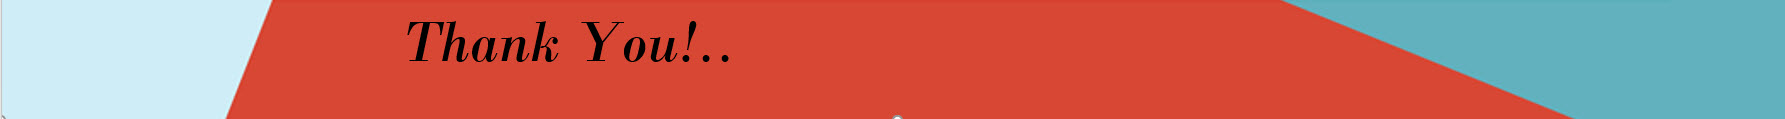